In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import geopandas as gp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import numpy as np

In [2]:
kl_path='../../data/nf_folder/Data/DerivedData/Derived/cntry_kl.csv'
flag_path="../../data/nf_folder/Data/AdditionalData/country_WoS_ECI_WB_flags.tsv"
world_geo_path="../../data/nf_folder/Data/AdditionalData/world_map_shp/ne_50m_admin_0_countries.shp"

In [3]:
plot_path="../../data/nf_folder/Figs/profiledifference_kl.pdf"

In [4]:
kl_df=pd.read_csv(kl_path)
flag_df=pd.read_csv(flag_path,sep="\t")
world_geo=gp.read_file(world_geo_path)

In [5]:
flag_df.head()

,WoS,ECI_Country,WB,Code
0,Albania,Albania,Albania,ALB
1,Algeria,Algeria,Algeria,DZA
2,Angola,Angola,Angola,AGO
3,Argentina,Argentina,Argentina,ARG
4,Australia,Australia,Australia,AUS


In [6]:
kl_df=kl_df.merge(flag_df[['WoS','Code']], left_on='country',right_on='WoS')
kl_df.head()

,country,kl,WoS,Code
0,Afghanistan,0.088699,Afghanistan,AFG
1,Albania,0.020994,Albania,ALB
2,Algeria,0.002062,Algeria,DZA
3,Andorra,0.227091,Andorra,AND
4,Angola,0.115770,Angola,AGO


In [7]:
world_geo=world_geo[['NAME', "ISO_A3", "geometry", "ADM0_A3", 'CONTINENT', 'SUBREGION']]
world_geo.head()

,NAME,ISO_A3,geometry,ADM0_A3,CONTINENT,SUBREGION
0,Zimbabwe,ZWE,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344...",ZWE,Africa,Eastern Africa
1,Zambia,ZMB,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643...",ZMB,Africa,Eastern Africa
2,Yemen,YEM,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...",YEM,Asia,Western Asia
3,Vietnam,VNM,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ...",VNM,Asia,South-Eastern Asia
4,Venezuela,VEN,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9...",VEN,South America,South America


In [15]:
plot_df=kl_df.merge(world_geo,left_on='Code',right_on='ISO_A3')
world_geo = world_geo[world_geo.CONTINENT != "Antarctica"]
plot_df=gp.GeoDataFrame(plot_df)

In [18]:
plot_df =plot_df.sort_values(by='kl')
plot_df['rank']=np.arange(len(plot_df))
plot_df

,country,kl,WoS,Code,NAME,ISO_A3,geometry,ADM0_A3,CONTINENT,SUBREGION,rank
78,Iran,0.000141,Iran,IRN,Iran,IRN,"MULTIPOLYGON (((56.18799 26.92114, 56.09492 26...",IRN,Asia,Southern Asia,0
35,China,0.000222,China,CHN,China,CHN,"MULTIPOLYGON (((118.18301 24.49629, 118.14951 ...",CHN,Asia,Eastern Asia,1
76,India,0.000447,India,IND,India,IND,"MULTIPOLYGON (((68.16504 23.85732, 68.23418 23...",IND,Asia,Southern Asia,2
179,Turkey,0.000492,Turkey,TUR,Turkey,TUR,"MULTIPOLYGON (((25.97002 40.13633, 25.74023 40...",TUR,Asia,Western Asia,3
159,South Korea,0.000686,South Korea,KOR,South Korea,KOR,"MULTIPOLYGON (((126.63389 37.78184, 126.66455 ...",KOR,Asia,Eastern Asia,4
...,...,...,...,...,...,...,...,...,...,...,...
37,Comoros,0.711317,Comoros,COM,Comoros,COM,"MULTIPOLYGON (((44.47637 -12.08154, 44.52676 -...",COM,Africa,Eastern Africa,189
39,Cook Islands,0.727912,Cook Islands,COK,Cook Is.,COK,"POLYGON ((-159.74053 -21.24922, -159.77256 -21...",COK,Oceania,Polynesia,190
108,Marshall Islands,0.750884,Marshall Islands,MHL,Marshall Is.,MHL,"MULTIPOLYGON (((169.63506 5.83008, 169.61543 5...",MHL,Oceania,Micronesia,191
148,Sao Tome & Principe,1.054101,Sao Tome & Principe,STP,SÃ£o TomÃ© and Principe,STP,"MULTIPOLYGON (((7.42383 1.56772, 7.38662 1.541...",STP,Africa,Middle Africa,192


In [16]:
def plot_worldmap(ax, fig, basemap, data, plotcolumn, cmap, vmin, vmax):
    """plot a basemap and color the country based on the column passed into
    """

    basemap.plot(ax=ax, linewidth=0.25, edgecolor="#8C8C8C", facecolor="#ffffff")
    data.plot(column=plotcolumn, cmap=cmap, vmin=vmin, vmax=vmax, ax=ax)
    ax.axis("off")
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    clb = fig.colorbar(sm, cax=cax)
    clb.ax.set_title('Rank')
    return fig, ax

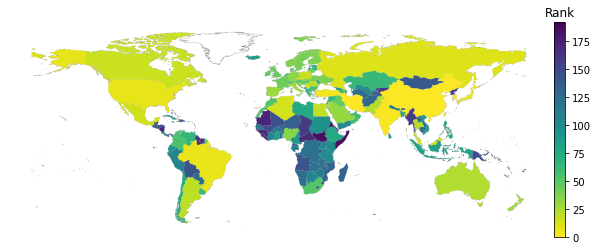

In [20]:
fig, ax = plt.subplots(1, figsize=(10, 6))
plot_worldmap(ax, fig, world_geo,plot_df,'Dependence','viridis_r',0,192)
plt.savefig("../../data/nf_folder/Figs/worldmap.pdf",format="pdf")

In [14]:
plot_df.sort_values(by='WoS')

,country,kl,WoS,Code,NAME,ISO_A3,geometry,ADM0_A3,CONTINENT,SUBREGION,rank
0,Afghanistan,0.088699,Afghanistan,AFG,Afghanistan,AFG,"POLYGON ((66.52227 37.34849, 66.82773 37.37129...",AFG,Asia,Southern Asia,128
1,Albania,0.020994,Albania,ALB,Albania,ALB,"POLYGON ((19.34238 41.86909, 19.34551 41.91885...",ALB,Europe,Southern Europe,80
2,Algeria,0.002062,Algeria,DZA,Algeria,DZA,"POLYGON ((8.57656 36.93721, 8.59766 36.88389, ...",DZA,Africa,Northern Africa,13
3,Andorra,0.227091,Andorra,AND,Andorra,AND,"POLYGON ((1.70605 42.50332, 1.67852 42.49668, ...",AND,Europe,Southern Europe,175
4,Angola,0.115770,Angola,AGO,Angola,AGO,"MULTIPOLYGON (((13.07275 -4.63477, 13.05732 -4...",AGO,Africa,Middle Africa,142
...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,0.011053,Venezuela,VEN,Venezuela,VEN,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9...",VEN,South America,South America,65
191,Vietnam,0.026530,Vietnam,VNM,Vietnam,VNM,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ...",VNM,Asia,South-Eastern Asia,87
192,Yemen,0.038494,Yemen,YEM,Yemen,YEM,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...",YEM,Asia,Western Asia,99
193,Zambia,0.076229,Zambia,ZMB,Zambia,ZMB,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643...",ZMB,Africa,Eastern Africa,119


In [40]:
plot_df.head(10)

,country,kl,WoS,Code,NAME,ISO_A3,geometry,ADM0_A3,CONTINENT,SUBREGION,rank
77,Iran,0.000141,Iran,IRN,Iran,IRN,"MULTIPOLYGON (((56.18799 26.92114, 56.09492 26...",IRN,Asia,Southern Asia,0
35,China,0.000222,China,CHN,China,CHN,"MULTIPOLYGON (((118.18301 24.49629, 118.14951 ...",CHN,Asia,Eastern Asia,1
75,India,0.000447,India,IND,India,IND,"MULTIPOLYGON (((68.16504 23.85732, 68.23418 23...",IND,Asia,Southern Asia,2
177,Turkey,0.000492,Turkey,TUR,Turkey,TUR,"MULTIPOLYGON (((25.97002 40.13633, 25.74023 40...",TUR,Asia,Western Asia,3
157,South Korea,0.000686,South Korea,KOR,South Korea,KOR,"MULTIPOLYGON (((126.63389 37.78184, 126.66455 ...",KOR,Asia,Eastern Asia,4
84,Japan,0.000850,Japan,JPN,Japan,JPN,"MULTIPOLYGON (((133.37051 36.20386, 133.32471 ...",JPN,Asia,Eastern Asia,5
22,Brazil,0.000861,Brazil,BRA,Brazil,BRA,"MULTIPOLYGON (((-66.87603 1.22305, -66.61904 0...",BRA,South America,South America,6
183,United States,0.001108,United States,USA,United States of America,USA,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576...",USA,North America,Northern America,7
139,Republic of Serbia,0.001297,Republic of Serbia,SRB,Serbia,SRB,"POLYGON ((21.36006 44.82666, 21.52314 44.79009...",SRB,Europe,Southern Europe,8
176,Tunisia,0.001346,Tunisia,TUN,Tunisia,TUN,"MULTIPOLYGON (((11.50459 33.18193, 11.50244 33...",TUN,Africa,Northern Africa,9


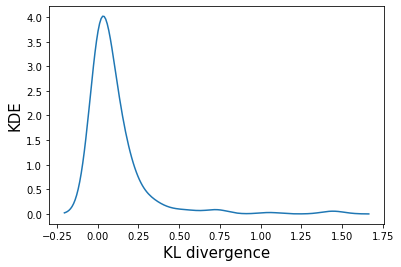

In [20]:
sns.kdeplot(x='kl',data=kl_df)
plt.xlabel("KL divergence",fontsize=15)
plt.ylabel("KDE", fontsize=15)
plt.savefig("kde.pdf")

In [35]:
len(plot_df)

192